In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 从两个假设的性质出发

假如一个小球从平面原点上方固定高度落下，我们希望知道小球落下后最后所处的位置是什么概率分布。在这种设定下，我们对这个分布由两个合理的假设

1. 小球落在某个位置的概率仅与该位置与原点的距离相关，则有 $p(x,y)=g(\sqrt{x^2+y^2})$
2. 小球的 x 轴位置和 y 轴位置相互独立，用 $f(x)$ 和 $f(y)$ 分别表示在 x 轴和 y 轴的概率分布，则有 $p(x,y)=f(x)f(y)$

### 函数形式推导

从上面两个性质可知

$$f(x)f(y) = g(\sqrt{x^2+y^2})$$

令 $y=0$，可以得到两个函数的转化关系，进而消去 g，仅用单个函数 f 来表示

$$
g(x) = f(x)f(0) \\
g(\sqrt{x^2+y^2})=f(\sqrt{x^2+y^2})f(0) \\
f(\sqrt{x^2+y^2})f(0)=f(x)f(y) \\
\frac{f(\sqrt{x^2+y^2})}{f(0)}=\frac{f(x)}{f(0)}\frac{f(y)}{f(0)}
$$

令 $h(x)=\frac{f(x)}{f(0)}$

$$h(\sqrt{x^2+y^2})=h(x)h(y)$$

令 $g(x^2)=h(x)$

$$g(x^2+y^2) = g(x^2)g(y^2)$$

从上式可得

$$g(1+1+\dots+1) = g(1)^x = g(x)$$

将底表示为 $e^c$，有

$$
g(x) = e^{cx}\\
h(x) = e^{cx^2}\\
f(x) = f(0)e^{cx^2}
$$

### 概率分布归一化

由于 f 是一个概率分布，则 c 一定小于 0，否则曲线和 x 轴无法围成一个有限大小的区域，令 $c=-b^2$，同时令 $f(0)=a$，有

$$f(x)=ae^{-b^2x^2}$$

考虑对 $f(x)$ 与 x 轴围成的面积做归一化，即
$$\int_{-\infty}^{\infty}f(x)dx=a\int_{-\infty}^{\infty}e^{-b^2x^2}dx=1$$

令 $u=bx$ 进行[积分换元](https://zh.wikipedia.org/zh-hans/%E6%8D%A2%E5%85%83%E7%A7%AF%E5%88%86%E6%B3%95)，有

$$a\int_{-\infty}^{\infty}e^{-b^2x^2}dx = \frac{a}{b}\int_{-\infty}^{\infty}e^{-u^2}du=1$$

$e^{-u}$ 是一条钟形曲线，我们希望求曲线下面积 $\int_{-\infty}^{\infty} e^{-u^2} du$，该积分无法直接求得

### $e^{-x^2}$

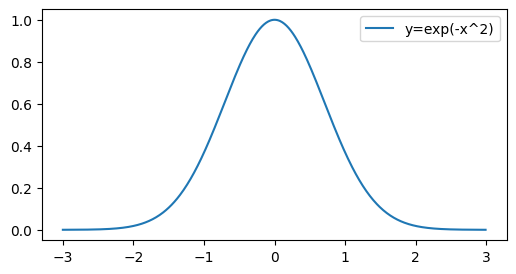

In [2]:
def basic(x):
  return np.exp(-x**2)

step = 0.01
x = np.arange(-3, 3, step)
y = basic(x)
plt.figure(figsize=(6, 3))
plt.plot(x, y, label="y=exp(-x^2)")
plt.legend()
plt.show()

### 曲线下面积

- 曲线下面积为 $\int_{-\infty}^{\infty} e^{-x^2} dx$，该积分无法直接求得
- 一个求解的 trick 是将曲线扫过 360 度，然后求曲面下体积，间接求得曲线下面积

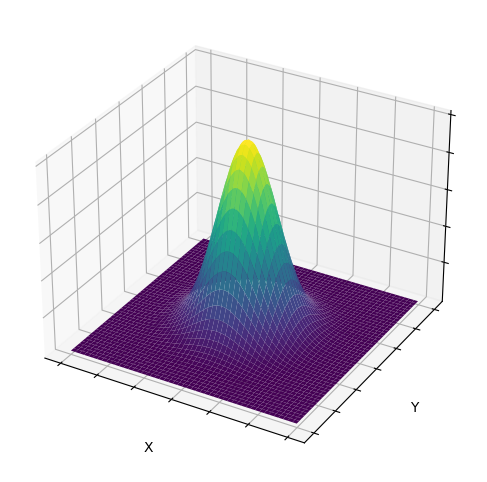

In [3]:
def basic2d(x, y):
  return np.exp(-(x**2+y**2))
  
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
x_, y_ = np.meshgrid(x, y)
z = basic2d(x_, y_)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x_, y_, z, cmap="viridis")
ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlabel("Z");
ax.set(xticklabels=[], yticklabels=[], zticklabels=[])
plt.show()

### 曲面下体积
- 曲面下体积可以想象成一个个圆柱体的积分 $\int_0^{\infty} 2\pi r f(x) dr=\pi\int_0^{\infty} 2r e^{-r^2} dr$，其中 r 表示离中心点的距离
- $2r e^{-r^2}$ 的原函数恰好可以直接求得为 $-e^{-r^2}$，因此上面的积分为 $\pi(-e^{-\infty^2} - (-e^{-0^2}))=\pi$，即曲面下体积为 $V=\pi$

### 与曲线下面积联系起来
- 现在从另一个角度看曲面下体积，沿着 y 轴切成一个个平面，沿着这个维度积分 $V=\int_{-\infty}^{\infty}C e^{-y^2}dy$
- 其中 C 表示y 取特定值时某个切面下的面积，他本身又是一个沿 x 轴方向的积分 $C=\int_{\infty}^{-\infty} e^{-x^2}dx$j，显然 C 即为 $e^{-x^2}$ 曲线下面积
- 由于 C 与 y 无关，仅与 x 相关，因此可以提到外面 $V=C\int_{-\infty}^{\infty}e^{-y^2}dy$，由于曲面是曲线旋转得到，关于原点堆成，所以第二项也等于 C，即 $V=C^2$
- 前面已经求出 $V=\pi$，所以 $C=\sqrt{\pi}$

In [4]:
# 曲线下面积等于根号 pi
print((basic(x)*step).sum())
print(np.pi**0.5)

1.772414684178717
1.7724538509055159


综上有

$$\frac{a}{b}\int_{-\infty}^{\infty}e^{-u^2}du=\frac{a}{b}\sqrt{\pi}=1$$

$$b=a\sqrt{\pi}$$

$$f(x)=ae^{-\pi a^2 x^2}$$

### $f(x)=ae^{-\pi a^2 x^2}$

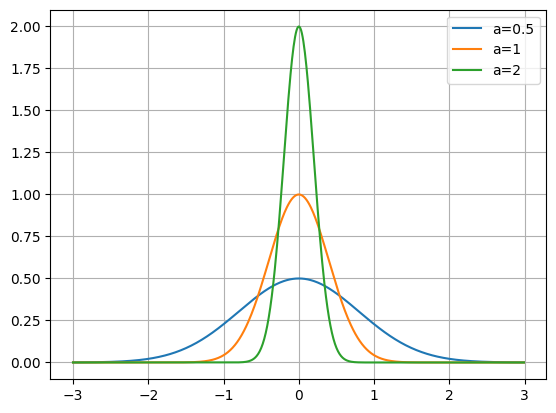

In [5]:
def fn(x, a):
  return a * np.exp(-np.pi * a**2 * x**2)

x = np.arange(-3, 3, step)
for a in [0.5, 1, 2]:
  y = fn(x, a)
  plt.plot(x, y, label=f"a={a}")
plt.grid()
plt.legend()
plt.show()

### 标准差来描述

上面得到了一个包含参数 a 的概率分布 $f(x)=ae^{-\pi a^2 x^2}$，可以通过求解标准差 $\sigma$ 和 a 的关系，使用标准差来描述这个分布

方差表示为

$$\sigma^2=\int_{-\infty}^{\infty}(x-\mu)^2f(x)dx=a\int_{-\infty}^{\infty}x^2e^{-\pi a^2x^2}$$

使用[分部积分法](https://zh.wikipedia.org/zh-hans/%E5%88%86%E9%83%A8%E7%A9%8D%E5%88%86%E6%B3%95)，令 $h(x)=x, k(x)=e^{-\pi a^2x^2}$

$$
\begin{aligned}
\int_{-\infty}^{\infty}h(x)k'(x)dx
&= h(x)k(x) - \int_{-\infty}^{\infty}h'(x)k(x)dx \\
&=[xe^{-\pi a^2x^2}]_{-\infty}^{\infty} - \int_{-\infty}^{\infty}e^{-\pi a^2x^2}dx \\
&=-\frac{1}{a}
\end{aligned}
$$

同时

$$\int_{-\infty}^{\infty}h(x)k'(x)Adx=\int_{-\infty}^{\infty}x(-2a^2\pi x e^{-\pi a^2 x^2})=-2a\pi\sigma^2$$

综合可得到 a 和标准差 $\sigma$ 的关系

$$a=\frac{1}{\sigma\sqrt{2\pi}}$$

代入原分布

$$f(x)=\frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{x^2}{2\pi\sigma^2}}$$

### 均值

上面的分布是 0 均值的，只需要对 x 进行平移即可得到不同均值的分布

$$f(x)=\frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\pi\sigma^2}}$$

至此，我们从两个性质出发，推导出了正态分布的形式。